In [25]:
import numpy as np
from tempfile import TemporaryFile
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = 'potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes'
features_list = features.split(',')
features_list = features_list * 4
for idx, feature in enumerate(features_list):
    if idx/36 == 0:
        features_list[idx] = 'goal_keeper_' + features_list[idx]
    elif idx/36 == 1:
        features_list[idx] = 'defenders_' + features_list[idx]
    elif idx/36 == 2:
        features_list[idx] = 'midfielders_' + features_list[idx]
    else:
        features_list[idx] = 'strikers_' + features_list[idx]
features_list = features_list * 2

for idx, feature in enumerate(features_list):
    if idx/144 == 1:
        features_list[idx] = 'away_' + features_list[idx]
print(features_list)

['goal_keeper_potential', 'goal_keeper_attacking_work_rate', 'goal_keeper_defensive_work_rate', 'goal_keeper_crossing', 'goal_keeper_finishing', 'goal_keeper_heading_accuracy', 'goal_keeper_short_passing', 'goal_keeper_volleys', 'goal_keeper_dribbling', 'goal_keeper_curve', 'goal_keeper_free_kick_accuracy', 'goal_keeper_long_passing', 'goal_keeper_ball_control', 'goal_keeper_acceleration', 'goal_keeper_sprint_speed', 'goal_keeper_agility', 'goal_keeper_reactions', 'goal_keeper_balance', 'goal_keeper_shot_power', 'goal_keeper_jumping', 'goal_keeper_stamina', 'goal_keeper_strength', 'goal_keeper_long_shots', 'goal_keeper_aggression', 'goal_keeper_interceptions', 'goal_keeper_positioning', 'goal_keeper_vision', 'goal_keeper_penalties', 'goal_keeper_marking', 'goal_keeper_standing_tackle', 'goal_keeper_sliding_tackle', 'goal_keeper_gk_diving', 'goal_keeper_gk_handling', 'goal_keeper_gk_kicking', 'goal_keeper_gk_positioning', 'goal_keeper_gk_reflexes', 'defenders_potential', 'defenders_atta

In [3]:
outfile = 'alldata.npz'
npzfile = np.load(outfile)
all_data = npzfile['arr_0']

In [4]:
def further_pruning(all_data,features_list):
    all_data = np.concatenate([all_data[:,31:67],all_data[:,72:103],all_data[:,108:139],all_data[:,175:211],all_data[:,216:247],all_data[:,252:283],all_data[:,-1].reshape([all_data.shape[0],1])],axis=1)
    features_list =  features_list[31:67] + features_list[72:103]+features_list[108:139]+features_list[175:211]+features_list[216:247]+ features_list[252:283]
    return features_list,all_data


In [5]:
features_list,all_data=further_pruning(all_data,features_list)
print all_data.shape
print len(features_list)

(15965L, 197L)
196


In [6]:
train_X,test_X,train_y,test_y = train_test_split(all_data[:,:-1],all_data[:,-1], test_size = 0.2, random_state = 4990)

In [35]:
C = np.linspace(0.01,10,10)
train_X  = (train_X-np.mean(train_X,axis = 0))/np.std(train_X,axis = 0)
test_X = (test_X - np.mean(train_X,axis = 0))/np.std(train_X,axis=0)
scores = np.zeros(10)
test_scores = np.zeros(10)
for (i,c) in enumerate(C):
    log = LogisticRegression(C = c,penalty='l1')
    cross = cross_val_score(log,train_X,train_y,cv = 5)
    scores[i] = np.mean(cross)
    log2 = LogisticRegression(C = c,penalty = "l1")
    log2.fit(train_X,train_y)
    test_scores[i] = log2.score(test_X,test_y)
    print c, scores[i],test_scores[i]

0.01 0.714452660115 0.672721578453
1.12 0.71186881558 0.71030378954
2.23 0.711790568342 0.710616974632
3.34 0.711320809076 0.71030378954
4.45 0.711320778427 0.71030378954
5.56 0.711320778427 0.709364234262
6.67 0.711320778427 0.709364234262
7.78 0.711320747778 0.708737864078
8.89 0.711164161355 0.708424678985
10.0 0.711242439242 0.708424678985


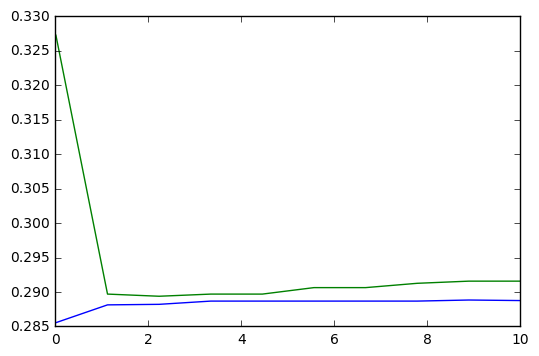

In [36]:
plt.plot(C,1-scores,C,1-test_scores)
plt.show()

In [18]:
bestc = C[np.argmax(scores)]
log = LogisticRegression(C = bestc,penalty = "l1")
log.fit(train_X,train_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
log.score(test_X,test_y)

0.67240839336047609

In [20]:
best_features = np.argsort(log.coef_).reshape(196)[::-1].reshape(196)
print len(features_list)
for idx in  best_features:
    print features_list[idx],log.coef_.reshape(196)[idx]


196
defenders_standing_tackle 0.167117980719
midfielders_reactions 0.144879805215
defenders_interceptions 0.103832140778
midfielders_short_passing 0.0789504872339
midfielders_ball_control 0.078590139883
goal_keeper_gk_kicking 0.076865632028
defenders_long_passing 0.0600562054418
strikers_positioning 0.0531946806405
defenders_marking 0.0498182805028
strikers_vision 0.0485765966552
midfielders_penalties 0.0470095037179
defenders_short_passing 0.0408407426649
defenders_sliding_tackle 0.0395993134289
midfielders_positioning 0.0381723204447
defenders_heading_accuracy 0.0380140567038
goal_keeper_gk_positioning 0.0373643526161
defenders_finishing 0.0306870876863
midfielders_vision 0.0295889573231
defenders_vision 0.029432255572
goal_keeper_gk_diving 0.0244261107958
strikers_jumping 0.024301118942
midfielders_curve 0.0226597065809
goal_keeper_gk_handling 0.0221384911165
midfielders_dribbling 0.0211840117022
strikers_ball_control 0.0205564715707
defenders_aggression 0.0176196423313
strikers_rea

In [21]:
coef = log.coef_/np.sum(np.abs(log.coef_),axis=1)
best_features = np.argsort(coef).reshape(196)[::-1].reshape(196)
print len(features_list)
for idx in  best_features:
    print features_list[idx],coef.reshape(196)[idx]

196
defenders_standing_tackle 0.0629893133868
midfielders_reactions 0.0546074061859
defenders_interceptions 0.0391359159976
midfielders_short_passing 0.0297576416435
midfielders_ball_control 0.0296218212361
goal_keeper_gk_kicking 0.0289718279484
defenders_long_passing 0.0226360989351
strikers_positioning 0.0200498856853
defenders_marking 0.0187772690256
strikers_vision 0.0183092594634
midfielders_penalties 0.0177185982568
defenders_short_passing 0.0153934982196
defenders_sliding_tackle 0.0149255846243
midfielders_positioning 0.0143877292249
defenders_heading_accuracy 0.0143280772094
goal_keeper_gk_positioning 0.0140831938389
defenders_finishing 0.0115664309423
midfielders_vision 0.0111525288757
defenders_vision 0.0110934655979
goal_keeper_gk_diving 0.00920657335085
strikers_jumping 0.00915946201661
midfielders_curve 0.00854078868675
goal_keeper_gk_handling 0.0083443346362
midfielders_dribbling 0.00798457680113
strikers_ball_control 0.00774804736345
defenders_aggression 0.00664111167327

In [ ]:
plt.plot()